/usr/local/lib/python3.7/dist-packages/scipy/integrate/_ivp/common.py:41: UserWarning: The following arguments have no effect for a chosen solver: `n_eval`.
  .format(", ".join("`{}`".format(x) for x in extraneous)))


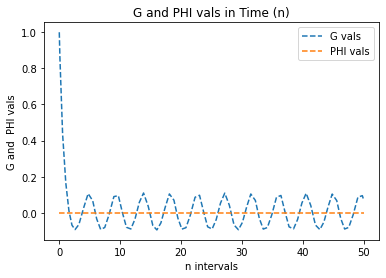

In [8]:
#importing important libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


#creating a global variable 
eta=1
#defining a de function
def coupled_de_func(n,y):

    #defining the variables
    Sc=1
    sigma=1
    alpha=1
    epsilion=10
    global eta

    #assigning each DE a vector element (Conversion from scalar to vector components)
    X1=y[0]
    X2=y[1]
    X3=y[2]
    X5=y[3]
    X6=y[4]
    X7=y[5]
    X8=y[6]
      
    #defining the des 
    dX1dn=X2
    dX2dn=X3
    dX3dn=-(X1*X2)/2
    dX5dn=X7
    dX6dn=X8
    dX7dn=sigma/2*(-X1*X7+X5*X2+eta*X2*X7)
    dX8dn=Sc/2*(-X1*X8+eta*X2*X8)

    return np.array([dX1dn,dX2dn,dX3dn,dX5dn,dX6dn,dX7dn,dX8dn])
    
n_span=np.array([0,50]) #--defining the time vector ranging from 0-50(can be changed based on ones preference)
times=np.linspace(n_span[0],n_span[1],100) #--converting the y-components into a sort of array with given dimensions

#lets say for instance we set the initial conditions as follows 
y0=[4,1,0,0,1,1,0]

#solving the DE using solve_ivp function
solution=solve_ivp(coupled_de_func,n_span,y0,n_eval=times) #---calling the solve_ivp function to solve our coupled_system  of equations
n=solution.t
X1=solution.y[0] #storing the outputs of the solve_ivp results in the following defined vector components
X2=solution.y[1]
X3=solution.y[2]
X5=solution.y[3]
X6=solution.y[4]
X7=solution.y[5]
X8=solution.y[6]


#plotting the G and PHI results
plt.plot(n,X7,'--',label='G vals')
plt.plot(n,X8, '--', label='PHI vals')
plt.title('G and PHI vals in Time (n)')
plt.xlabel('n intervals')
plt.ylabel('G and  PHI vals')
plt.legend()
plt.show()
